<a href="https://colab.research.google.com/github/agomezalejo/ejercicios-2022-2c/blob/main/7506R_TP1_GRUPO15_CHP3_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1: Reservas de Hotel</center>
### <center> Grupo número 15</center>
### <center> Giacobbe, Juan Ignacio; Olaran, Sebastian; Ayala, Tomás</center>

#Checkpoint 3: Ensambles

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importamos las librerías que vamos a utilizar

In [2]:
#Para análisis de los datos
import pandas as pd
import numpy as np

#Para visualizaciones
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('always')

#Para crear nuestros modelos predictivos
import sklearn as sk
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import DistanceMetric
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

Cargamos los archivos csv de datos en dos DataFrames de Pandas(importamos para el dataset de train el dataset que nos quedó como resultado en el checkpoint 2)

In [3]:
ds_hoteles_test = pd.read_csv('./ds_hoteles_test_checkpoint_3.csv')
ds_hoteles_train = pd.read_csv('./ds_hoteles_train_checkpoint_3.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


##Breve resumen del dataset
Comenzamos haciendo un breve repaso de las características del dataset a analizar

In [4]:
ds_hoteles_train.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(60897, 47)

Tenemos un dataset con 60897 registros de reservas de hotel, con 32 columnas correspondientes a variables que describen las reservas(por ejemplo, tenemos una variable que indica la cantidad de adultos que tenemos por reserva).


Veamos los primeros dos registros del dataset

In [5]:
ds_hoteles_train.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

,Unnamed: 0.1,Unnamed: 0,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable
0,0,0,49,2016,0,37,5,1,2,1,...,0,0,0,1,0,0,1,0,0,0
1,1,1,4,2015,1,44,31,0,1,2,...,0,1,0,0,0,0,1,0,0,0


Veamos las variables que hay en el dataset

In [6]:
ds_hoteles_train.columns.tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Unnamed: 0.1',
 'Unnamed: 0',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'country',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_canceled',
 'hotel_Resort Hotel',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'market_segment_Undefined',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'distribution_channel_Undefined',
 'customer_type_Group',
 'customer_type_Transient',
 'cus

**Descripción de cada campo**



*   hotel(categórica): indica el tipo de hotel en el que se realizó la reserva.
*   lead_time(cualitativa): indica el tiempo desde que se reservó hasta que la persona llegó al hotel.
*   arrival_date_year/month/week_number/day_of_month: indican la fecha de llegada.
*   stays_in_weekend/week_nights: indican las noches que están reservadas.
*   adults, children, babies: indican la cantidad de adultos, niños y bebés respectivamente.
*   meal: indica el tipo de comida que incluye la reserva.
*   country: el país destino de la reserva.
*   market_segment: Segmento del mercado al cual está destinada la reserva.
*   distribution_chanel: Canal de distribución de reservas
*   is_repeated_guest: Indica si el cliente ya ha tenido experiencia reservando.
*   previous_cancellations/ previous_bookings_not_canceled: Indican la cantidad de reservas canceladas y no canceladas de un cliente.
*   reserved_room_type/ assigned_room_type: Tipo de habitación reservada y asignada respectivamente.
*   booking_changes: Cambios que hubieron en el booking.
*   deposit_type: Tipo de depósito que tuvo la reserva.
*   agent: Agente de viajes al que está asignada la reserva.
*   company: Empresa a cargo del booking de la reserva.
*   days_in_waiting_list: Días en que la reserva estuvo en lista de espera.
*   customer_type: Tipo de cliente que tuvo la reserva.
*   adr: Precio promedio de alquiler por día.
*   required_car_parking_spaces: Cantidad de espacios de estacionamiento requeridos.
*   total_of_special_requests: Cantidad de invitados.



---

##Construcción de ensambles

Enumeramos los features que utilizaremos para nuestros modelos predictivos

In [7]:
features = ['hotel_Resort Hotel', 'meal_FB', 'meal_HB', 'meal_SC', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
 'adults', 'children', 'babies', 'country', 'meal_Undefined', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO',
'market_segment_Online TA', 'market_segment_Undefined',
 'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
  'booking_changes', 'deposit_type_Non Refund', 'deposit_type_Refundable', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
 'total_of_special_requests']

target = 'is_canceled'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Separamos en conjuntos de train y test

In [8]:
#Separo un set de Evaluacion
from sklearn.model_selection import train_test_split

#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_hoteles_train.drop([target], axis='columns', inplace=False)

ds_trabajo_x = ds_trabajo_x.dropna()

#Creo un dataset con la variable target
ds_trabajo_y = ds_hoteles_train[target].copy()
ds_trabajo_y = ds_trabajo_y.dropna()

x_train, x_test, y_train, y_test = train_test_split(ds_hoteles_train[features].values,
                                                    ds_hoteles_train[target].values,
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=ds_hoteles_train[target].values) #estratificado para mantener proporcion

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48717
# Datos Prueba: 12180
% Positivos Entrenamiento: 50.459
% Positivos Prueba: 50.460


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###A) Clasificadores KNN

Lo que haremos será optimizar sus hiperparámetros mediante Random Search k-fold Cross Validation

Antes de comenzar, vemos en la documentación oficial de scikit learn que KNN tiene un hiperparámetro que se llama "algoritmo", y básicamente indica el algoritmo a utilizar para encontrar los k vecinos más cercanos. Tenemos tres algoritmos posibles: ball_tree, kd_tree y "fuerza bruta". El problema es que cada algoritmo utiliza un conjunto de las posibles distancias, no todas.

Veamos entonces las distancias admitidas por cada algoritmo

In [ ]:
from sklearn.metrics.pairwise import PAIRWISE_DISTANCE_FUNCTIONS
from sklearn.neighbors import BallTree
from sklearn.neighbors import KDTree

#Métricas Válidas
VALID_METRICS = dict(
    ball_tree=BallTree.valid_metrics,
    kd_tree=KDTree.valid_metrics,
    # The following list comes from the sklearn.metrics.pairwise doc string
    brute=list(PAIRWISE_DISTANCE_FUNCTIONS.keys())
    + [ 'braycurtis','canberra','chebyshev','correlation',
        'cosine','dice','hamming','jaccard','kulsinski',
        'mahalanobis','matching','minkowski','rogerstanimoto',
        'russellrao','seuclidean','sokalmichener','sokalsneath',
        'sqeuclidean','yule','wminkowski',
    ],
)

#Ejemplo
for alg in VALID_METRICS:
    print(f'algoritmo: {alg}')
    print(VALID_METRICS[alg])
    print()

algoritmo: ball_tree
['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity', 'seuclidean', 'mahalanobis', 'wminkowski', 'hamming', 'canberra', 'braycurtis', 'matching', 'jaccard', 'dice', 'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath', 'haversine', 'pyfunc']

algoritmo: kd_tree
['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity']

algoritmo: brute
['cityblock', 'cosine', 'euclidean', 'haversine', 'l2', 'l1', 'manhattan', 'precomputed', 'nan_euclidean', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'wminkowski']



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sabiendo esto, vemos que los 3 algoritmos admiten las distancias manhattan, euclideana y chebyshev, y por lo general son las más utilizadas al construir KNNs.

Ahora, utilicemos Random Search k-fold Cross Validation para optimizar los hiperparámetros del modelo.

####Primer modelo KNN

In [ ]:
#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,100),
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=10, scoring='f1', n_iter=10, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


array([0.73040244, 0.777184  , 0.6690257 , 0.74757978, 0.74740869,
       0.78669156, 0.69491765, 0.7477069 , 0.75756273, 0.66309074])

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 20, 'metric': 'manhattan', 'algorithm': 'brute'}
0.7866915589604487


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
#Mejor estimador
knn_classifier_1 = KNeighborsClassifier(n_neighbors= 20, weights= 'distance', metric='manhattan', algorithm='brute')
#Predicción con mejor estimador
knn_classifier_1.fit(x_train, y_train)
y_pred=knn_classifier_1.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.7887975744035745

#####Predicción sobre el dataset test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
predict = knn_classifier_1.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names


1    14467
0    12068
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_knn1.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


####Segundo modelo KNN

In [ ]:
#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,100),
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=5, scoring='f1', n_iter=100, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


array([0.75513352, 0.78218996, 0.75578016, 0.75366916, 0.77471387,
       0.78147878, 0.6915248 , 0.72446397, 0.67569398, 0.78281773,
       0.72957172, 0.72546457, 0.78167783, 0.66200455, 0.78157629,
       0.78259708, 0.73426803, 0.78167545, 0.7550493 , 0.68754312,
       0.72942662, 0.70815344, 0.74404232, 0.78243582, 0.78284003,
       0.74454328, 0.69243886, 0.74410287, 0.7561692 , 0.68164568,
       0.75361071, 0.71023167, 0.68163018, 0.7028966 , 0.78197546,
       0.75502898, 0.75455055, 0.75558678, 0.78262822, 0.6693847 ,
       0.72366561, 0.66667955, 0.77564232, 0.73200863, 0.74537959,
       0.73258472, 0.78159836, 0.73376703, 0.68439881, 0.68716464,
       0.72432215, 0.77756122, 0.74454049, 0.66231638, 0.67191828,
       0.67259269, 0.68529939, 0.6802104 , 0.70269402, 0.721965  ,
       0.7462963 , 0.75544465, 0.68026793, 0.72712729, 0.68823666,
       0.68636947, 0.75553196, 0.7426937 , 0.75463616, 0.74512977,
       0.77001289, 0.66641046, 0.68286608, 0.78249513, 0.78201

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 33, 'metric': 'manhattan', 'algorithm': 'kd_tree'}
0.78290768243381


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.7896161809205287

#####Predicción sobre el dataset test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
predict = best_knn.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names


1    14569
0    11966
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_knn2.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


####Tercer modelo KNN

In [ ]:
params_grid={ 'n_neighbors':range(15,50),
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=7, scoring='f1', n_iter=100, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


array([0.69516792, 0.7464123 , 0.69691047, 0.67319062, 0.78543622,
       0.75613101, 0.72879026, 0.67767827, 0.75683337, 0.75758122,
       0.68402578, 0.75723149, 0.690383  , 0.73127564, 0.74521428,
       0.78483483, 0.78577138, 0.78475729, 0.74515502, 0.78525146,
       0.7291836 , 0.73732573, 0.67247593, 0.78602403, 0.74671215,
       0.78520079, 0.7848768 , 0.74470593, 0.78479525, 0.68679738,
       0.73492858, 0.68641643, 0.75670337, 0.75632021, 0.70183424,
       0.7462998 , 0.78635967, 0.72780184, 0.74766229, 0.69402026,
       0.75605543, 0.67327722, 0.72818229, 0.73477367, 0.73128335,
       0.7329642 , 0.78527457, 0.74596662, 0.74526672, 0.72894965,
       0.67028471, 0.78555787, 0.68357609, 0.72745522, 0.74416801,
       0.6801247 , 0.78481615, 0.75711451, 0.78576789, 0.7851366 ,
       0.68166224, 0.75764135, 0.75652775, 0.74679216, 0.78478211,
       0.74688164, 0.7859032 , 0.74585519, 0.73250751, 0.75681203,
       0.68005356, 0.74618225, 0.68001013, 0.78512188, 0.73156

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 40, 'metric': 'manhattan', 'algorithm': 'ball_tree'}
0.7867817463091813


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.789830238303977

#####Predicción sobre el dataset test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
predict = best_knn.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names


1    14630
0    11905
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreCl

,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_knn3.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


####Cuarto modelo KNN

Modifico los features un poco

In [ ]:
features = ['hotel_Resort Hotel', 'meal_FB', 'meal_HB', 'meal_SC', 'lead_time', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
 'adults', 'children', 'babies', 'country', 'meal_Undefined', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO',
'market_segment_Online TA', 'market_segment_Undefined',
 'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
  'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
 'total_of_special_requests']

target = 'is_canceled'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Separamos en conjuntos de train y test (proporción fernet)

In [ ]:
#Separo un set de Evaluacion
from sklearn.model_selection import train_test_split

#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_hoteles_train.drop([target], axis='columns', inplace=False)

ds_trabajo_x = ds_trabajo_x.dropna()

#Creo un dataset con la variable target
ds_trabajo_y = ds_hoteles_train[target].copy()
ds_trabajo_y = ds_trabajo_y.dropna()

x_train, x_test, y_train, y_test = train_test_split(ds_hoteles_train[features].values,
                                                    ds_hoteles_train[target].values,
                                                    test_size=0.3,    #30% al conjunto de test
                                                    random_state=0,  #para poder reproducir el experimento
                                                    stratify=ds_hoteles_train[target].values) #estratificado para mantener proporcion

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 42627
# Datos Prueba: 18270
% Positivos Entrenamiento: 50.459
% Positivos Prueba: 50.460


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,100),
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=5, scoring='accuracy', n_iter=75, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.74903227, 0.77500176, 0.75008791, 0.75058058, 0.76686139,
       0.7733831 , 0.70530435, 0.71116914, 0.67914715, 0.7759636 ,
       0.73620007, 0.71412494, 0.77476715, 0.66849667, 0.76775291,
       0.76791704, 0.74652204, 0.77425107, 0.74455161, 0.69941595,
       0.72562   , 0.71236532, 0.73795949, 0.76838624, 0.77333614,
       0.73589516, 0.69509954, 0.73744347, 0.74818769, 0.69807883,
       0.74799996, 0.71285805, 0.68639605, 0.72386032, 0.77352379,
       0.74455162, 0.7515894 , 0.74778894, 0.77523635, 0.67501824,
       0.71581404, 0.67056107, 0.76962955, 0.74384769, 0.74037578,
       0.72998335, 0.76733064, 0.72899799, 0.6852231 , 0.68768622,
       0.71142721, 0.77106052, 0.73767808, 0.67210936, 0.68390932,
       0.68128195, 0.68780356, 0.68728749, 0.71025394, 0.71224826,
       0.74049308, 0.75067441, 0.68876543, 0.733643  , 0.69162738,
       0.68794428, 0.74764819, 0.73840527, 0.75241039, 0.73922622,
       0.76130146, 0.66898924, 0.68280675, 0.77063829, 0.77136

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 21, 'metric': 'manhattan', 'algorithm': 'kd_tree'}
0.7759635986662843


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.7910338326175762

#####Predicción sobre el dataset test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predict = best_knn.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


1    15190
0    11345
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,0
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_knn4.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


####Quinto modelo KNN

In [ ]:
#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,100),
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=10, scoring='accuracy', n_iter=50, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.75339556, 0.77805153, 0.75424007, 0.75531932, 0.77150634,
       0.77779343, 0.70833064, 0.71353853, 0.68092996, 0.77983448,
       0.73878076, 0.72050591, 0.77819217, 0.67053766, 0.77221002,
       0.77324226, 0.74997066, 0.77776997, 0.74943106, 0.70288805,
       0.72871667, 0.71520388, 0.74054005, 0.77310162, 0.77755863,
       0.73953129, 0.69861829, 0.74072766, 0.75142513, 0.70094081,
       0.75203506, 0.71621257, 0.69031369, 0.72533822, 0.77748845,
       0.74950144, 0.7544513 , 0.75280904, 0.77784034, 0.68024977,
       0.72139728, 0.67314145, 0.77300781, 0.74760118, 0.74328468,
       0.73354908, 0.77138893, 0.73225906, 0.69043106, 0.69127556])

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 21, 'metric': 'manhattan', 'algorithm': 'kd_tree'}
0.7798344820541204


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Mejor estimador
knn_classifier_5 = KNeighborsClassifier(n_neighbors= 21, weights= 'distance', metric='manhattan', algorithm='kd_tree')
#Predicción con mejor estimador
knn_classifier_5.fit(x_train, y_train)
y_pred=knn_classifier_5.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.7910338326175762

#####Predicción sobre el dataset test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predict = knn_classifier_5.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


1    15190
0    11345
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,0
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_knn5.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####Sexto modelo KNN

Modifico los features un poco

In [ ]:
features = ['hotel_Resort Hotel', 'meal_FB', 'meal_HB', 'meal_SC', 'lead_time', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
 'adults', 'children', 'babies', 'country', 'meal_Undefined', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO',
'market_segment_Online TA', 'market_segment_Undefined',
 'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
  'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
 'total_of_special_requests']

target = 'is_canceled'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Separamos en conjuntos de train y test (proporción 80 20)

In [ ]:
#Separo un set de Evaluacion
from sklearn.model_selection import train_test_split

#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_hoteles_train.drop([target], axis='columns', inplace=False)

ds_trabajo_x = ds_trabajo_x.dropna()

#Creo un dataset con la variable target
ds_trabajo_y = ds_hoteles_train[target].copy()
ds_trabajo_y = ds_trabajo_y.dropna()

x_train, x_test, y_train, y_test = train_test_split(ds_hoteles_train[features].values,
                                                    ds_hoteles_train[target].values,
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=ds_hoteles_train[target].values) #estratificado para mantener proporcion

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48717
# Datos Prueba: 12180
% Positivos Entrenamiento: 50.459
% Positivos Prueba: 50.460


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,100),
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 5 Folds y 50 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=5, scoring='accuracy', n_iter=50, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.75144192, 0.77913258, 0.75408997, 0.75604004, 0.77157879,
       0.78001521, 0.7039843 , 0.71001902, 0.67727896, 0.77919413,
       0.73684752, 0.71763447, 0.77948154, 0.6674466 , 0.77053182,
       0.77116818, 0.75049777, 0.77802419, 0.74764439, 0.70147987,
       0.72617354, 0.7139191 , 0.74105552, 0.77196872, 0.77857836,
       0.73820226, 0.69439823, 0.74011122, 0.75608113, 0.69501406,
       0.75470578, 0.71630021, 0.6840323 , 0.72908838, 0.77837309,
       0.74760333, 0.75620424, 0.75035404, 0.77960469, 0.67249618,
       0.71829135, 0.66896548, 0.77447308, 0.74745985, 0.74325187,
       0.73015583, 0.77063445, 0.73426116, 0.68390902, 0.68834284])

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 13, 'metric': 'manhattan', 'algorithm': 'kd_tree'}
0.7800152064881916


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.7934859570450791

#####Predicción sobre el dataset test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predict = best_knn.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


1    14969
0    11566
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,1
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_knn6.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####Séptimo modelo KNN

In [ ]:
features = ['hotel_Resort Hotel', 'lead_time', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
 'adults', 'children', 'babies', 'country', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO',
'market_segment_Online TA', 'market_segment_Undefined',
 'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
  'booking_changes', 'deposit_type_Non Refund', 'deposit_type_Refundable', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
 'total_of_special_requests']

target = 'is_canceled'

Separamos en conjuntos de train y test (proporción 80 20)

In [ ]:
#Separo un set de Evaluacion
from sklearn.model_selection import train_test_split

#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_hoteles_train.drop([target], axis='columns', inplace=False)

ds_trabajo_x = ds_trabajo_x.dropna()

#Creo un dataset con la variable target
ds_trabajo_y = ds_hoteles_train[target].copy()
ds_trabajo_y = ds_trabajo_y.dropna()

x_train, x_test, y_train, y_test = train_test_split(ds_hoteles_train[features].values,
                                                    ds_hoteles_train[target].values,
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=ds_hoteles_train[target].values) #estratificado para mantener proporcion

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48717
# Datos Prueba: 12180
% Positivos Entrenamiento: 50.459
% Positivos Prueba: 50.460


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,100),
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 5 Folds y 100 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=5, scoring='accuracy', n_iter=100, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.75164722, 0.77946094, 0.75458261, 0.75571162, 0.77036773,
       0.7798305 , 0.70449744, 0.71334441, 0.67727896, 0.78071315,
       0.73949548, 0.721124  , 0.78081583, 0.6674466 , 0.77262561,
       0.77385715, 0.75037459, 0.77900943, 0.74817808, 0.70189043,
       0.72787724, 0.71465806, 0.74095288, 0.7743703 , 0.78011782,
       0.73812016, 0.69439823, 0.73996753, 0.75523947, 0.69509617,
       0.75501368, 0.71703918, 0.68417599, 0.72966312, 0.77853733,
       0.74828072, 0.75640956, 0.75129828, 0.78067208, 0.67251671,
       0.72149351, 0.66896548, 0.77420623, 0.74883516, 0.74316976,
       0.73309113, 0.77287192, 0.73364536, 0.68392954, 0.68881496,
       0.71467859, 0.77664884, 0.74023439, 0.67038185, 0.68442219,
       0.68087124, 0.68670067, 0.68620794, 0.71129182, 0.71543812,
       0.74241024, 0.75503422, 0.68672118, 0.73430212, 0.69142184,
       0.68698801, 0.75111353, 0.74255399, 0.75532159, 0.741425  ,
       0.76849975, 0.66795973, 0.6826979 , 0.77705941, 0.77726

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 20, 'metric': 'manhattan', 'algorithm': 'ball_tree'}
0.7808158255002497


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.7931712689796239

#####Predicción sobre el dataset test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predict = best_knn.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


1    14929
0    11606
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,1
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_knn7.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


###B) Clasificador SVM

####Normalización de datos

Habiendo investigado sobre el funcionamiento de los Support Vector Machines de la librería scikit learn, hemos encontrado que, para obtener una mejor performance en este tipo de estimadores necesitamos tener conjuntos de datos con desviación estándar unitaria para cada característica. Esto significa en que debemos normalizar los datos que vamos a utilizar para crear el modelo.

Para los SVM, utilizaremos Standard Scaler, y MinMax Scaler, e iremos viendo cómo varían las performances de los modelos.

In [9]:
#Separo un set de Evaluacion
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_hoteles_train.drop([target], axis='columns', inplace=False)

ds_trabajo_x = ds_trabajo_x.dropna()

#Creo un dataset con la variable target
ds_trabajo_y = ds_hoteles_train[target].copy()
ds_trabajo_y = ds_trabajo_y.dropna()

x_train, x_test, y_train, y_test = train_test_split(ds_hoteles_train[features].values,
                                                    ds_hoteles_train[target].values,
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=ds_hoteles_train[target].values) #estratificado para mantener proporcion

#Armo una version escalada con minmax (media=0 , var=1  )
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax  = min_max_scaler.transform(x_test)

#Armo una version estandarizada
stand_scaler = preprocessing.StandardScaler()
x_train_norm = stand_scaler.fit_transform(x_train)
x_test_norm=stand_scaler.transform(x_test)

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48717
# Datos Prueba: 12180
% Positivos Entrenamiento: 50.459
% Positivos Prueba: 50.460


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Conseguimos de esta forma una normalización de datos para crear nuestros modelos. Ahora, optimicemos los hiperparámetros de los SVM para buscar obtener la mejor performance.

#### Primer modelo SVM(Kernel del tipo Lineal)

#####Optimización de hiperparámetros

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Conjunto de parámetros que quiero usar
params_grid = {'C': [0, 1, 10, 100, 1000], 'kernel': ['linear']}

#Clasificador
base_svm = SVC()

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score)

#GridSearch CV
gridcv = GridSearchCV(estimator=base_svm ,param_grid=params_grid,scoring=scorer_fn)

gridcv.fit(x_train_minmax,y_train)

gridcv.cv_results_['mean_test_score']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_

array([       nan, 0.75102215, 0.75609867, 0.75652421, 0.75673928])

In [ ]:
#Mejores hiperparametros
print(gridcv.best_params_)
#Mejor métrica
print(gridcv.best_score_)

{'C': 1000, 'kernel': 'linear'}
0.7567392795961597


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
#Mejor estimador
best_svm=gridcv.best_estimator_

#Predicción con mejor estimador
y_pred=best_svm.predict(x_test_minmax)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.7550442173950374

####Predicción sobre el dataset test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

x_dataset_test_minmax  = min_max_scaler.transform(ds_test_prediccion[features])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names


In [ ]:
predict = best_svm.predict(x_dataset_test_minmax)

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0    14562
1    11973
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreCl

,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,0
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_svm1.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


###Segundo modelo SVM(Kernel del tipo polinomial) (0.80577)

####Optimización de hiperparámetros

In [ ]:
from scipy.stats._levy_stable import uniform
from scipy import stats
from sklearn.svm import SVC

# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1),
             "kernel": ["poly"],
             "degree" : [5, 10], "gamma": [5, 10], "coef0": [5, 15]
             }

#Conjunto de parámetros que quiero usar
params_grid = {'C': stats.uniform(2, 10), "gamma": stats.uniform(0.1,1)} #"degree" : [5, 10], , "coef0": [5, 15]

#Clasificador
base_svm = SVC(kernel = "poly")

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score)

#GridSearch CV
# gridcv = GridSearchCV(estimator=base_svm ,param_grid=params_grid,scoring=scorer_fn)
#rand_search = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc)
rand_search = RandomizedSearchCV(base_svm ,param_distributions = params_grid, scoring=scorer_fn)


rand_search.fit(x_train_minmax,y_train)

rand_search.cv_results_['mean_test_score']

#rand_search.fit(x, y)
#rand_search.cv_results_m

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.82398595, 0.82446303, 0.82448651, 0.80891801, 0.82328837,
       0.82330536, 0.82439039, 0.82329685, 0.80756563, 0.76722797])

In [ ]:
#Mejores hiperparametros
print(rand_search.best_params_)
#Mejor métrica
print(rand_search.best_score_)

{'C': 11.486168673439304, 'gamma': 0.5416227006820964}
0.8244865106141864


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
svm_poly = SVC(kernel = "poly", C = 11.486168673439304, gamma = 0.5416227006820964)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Mejor estimador
best_svm=rand_search.best_estimator_

#Predicción con mejor estimador
y_pred=best_svm.predict(x_test_minmax)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8308859924104934

####Predicción sobre el dataset test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

x_dataset_test_minmax  = min_max_scaler.transform(ds_test_prediccion[features])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names


In [ ]:
predict = best_svm.predict(x_dataset_test_minmax)

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()m

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1    13466
0    13069
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,1
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_svm2 poly.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


###Tercer modelo SVM(Kernel del tipo radial) (Template)

####Optimización de hiperparámetros

In [ ]:
from scipy.stats._levy_stable import uniform
from scipy import stats
from sklearn.svm import SVC

# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1),
             "kernel": ["poly"],
             "degree" : [5, 10], "gamma": [5, 10], "coef0": [5, 15]
             }

#Conjunto de parámetros que quiero usar
params_grid = {'C': stats.uniform(2, 10), "gamma": stats.uniform(0.1,1)} #"degree" : [5, 10], , "coef0": [5, 15]

#Clasificador
base_svm = SVC(kernel = "rbf")

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score)

#GridSearch CV
# gridcv = GridSearchCV(estimator=base_svm ,param_grid=params_grid,scoring=scorer_fn)
#rand_search = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc)
rand_search = RandomizedSearchCV(base_svm ,param_distributions = params_grid, scoring=scorer_fn)


rand_search.fit(x_train_minmax,y_train)

rand_search.cv_results_['mean_test_score']

#rand_search.fit(x, y)
#rand_search.cv_results_m

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Mejores hiperparametros
print(rand_search.best_params_)
#Mejor métrica
print(rand_search.best_score_)

In [ ]:
svm_poly = SVC(kernel = "rbf", C = 11.486168673439304, gamma = 0.5416227006820964)

In [ ]:
#Mejor estimador
best_svm=rand_search.best_estimator_

#Predicción con mejor estimador
y_pred=best_svm.predict(x_test_minmax)

#Accuracy test
f1_score(y_test,y_pred)

####Predicción sobre el dataset test

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

x_dataset_test_minmax  = min_max_scaler.transform(ds_test_prediccion[features])

In [ ]:
predict = best_svm.predict(x_dataset_test_minmax)

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

In [ ]:
ds_resultados.to_csv("predicciones_svm_radial.csv", index = False)

###C) Clasificador Random Forest(RF)

Random Forest es un tipo de algoritmo de ensamble, lo que significa que combina múltiples modelos (en este caso, árboles de decisión) para mejorar el rendimiento general y reducir el sobreajuste. Esto se hace mediante el proceso de promedio o votación de los resultados de los árboles individuales.

Dado nuestros features, vamos a crear una instancia de Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Creamos un clasificador con hiperparámetros arbitrarios
rfc = RandomForestClassifier(max_features='auto',
                             oob_score=True,
                             random_state=2,
                             n_jobs=-1,
                             criterion="entropy",
                             min_samples_leaf=12,
                             min_samples_split=13,
                             n_estimators= 100 )
#Entrenamos el modelo
model = rfc.fit(X = x_train, y = y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec()

In [ ]:
#Predicción con mejor estimador
y_pred=model.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.8527501438789773

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,test,pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Text(50.722222222222214, 0.5, 'True')

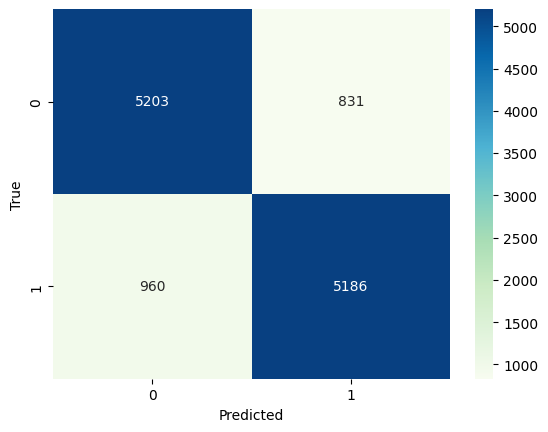

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
predict = model.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names


0    13593
1    12942
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_rf1.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


###Clasificador Random Forest(2)

Random Forest es un tipo de algoritmo de ensamble, lo que significa que combina múltiples modelos (en este caso, árboles de decisión) para mejorar el rendimiento general y reducir el sobreajuste. Esto se hace mediante el proceso de promedio o votación de los resultados de los árboles individuales.

Dado nuestros features,vamos a crear una instancia de random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


#Creamos un clasificador con hiperparámetros arbitrarios
rfc = RandomForestClassifier(max_features='auto',
                             oob_score=True,
                             random_state=2,
                             n_jobs=-1,
                             criterion="entropy",
                             min_samples_leaf=10,
                             min_samples_split=15,
                             n_estimators= 1000 )
#Entrenamos el modelo
model = rfc.fit(X = x_train, y = y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


In [ ]:

#Predicción con mejor estimador
y_pred=model.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.8561103810775295

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,test,pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Text(50.722222222222214, 0.5, 'True')

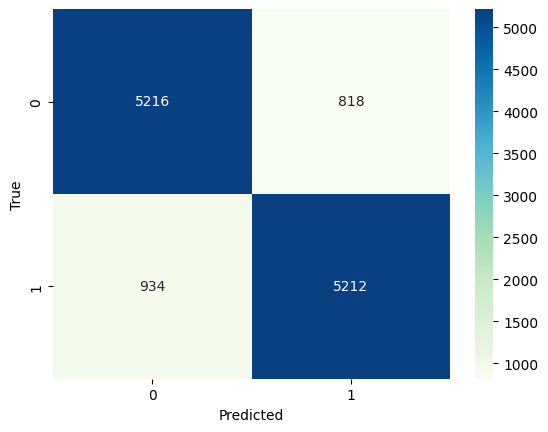

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
predict = model.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names


0    13663
1    12872
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_rf2.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


###Clasificador Random Forest(3)

Random Forest es un tipo de algoritmo de ensamble, lo que significa que combina múltiples modelos (en este caso, árboles de decisión) para mejorar el rendimiento general y reducir el sobreajuste. Esto se hace mediante el proceso de promedio o votación de los resultados de los árboles individuales.

Dado nuestros features,vamos a crear una instancia de random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


#Creamos un clasificador con hiperparámetros arbitrarios
rfc = RandomForestClassifier(max_features='auto',
                             oob_score=True,
                             random_state=2,
                             n_jobs=-1,
                             criterion="entropy",
                             min_samples_leaf=10,
                             min_samples_split=18,
                             n_estimators= 3000 )
#Entrenamos el modelo
model = rfc.fit(X = x_train, y = y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


In [ ]:

#Predicción con mejor estimador
y_pred=model.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.8561328510358435

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,test,pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Text(50.722222222222214, 0.5, 'True')

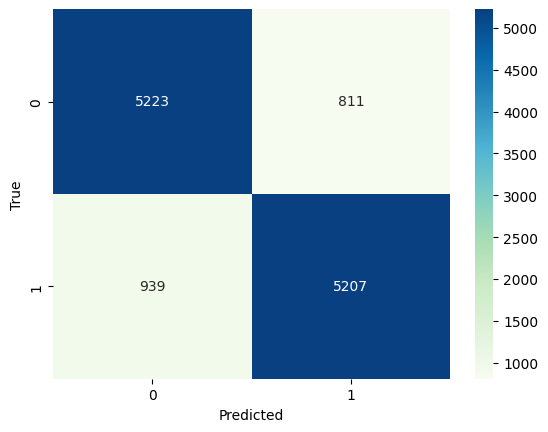

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [ ]:
predict = model.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names


0    13680
1    12855
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_rf3.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


###Clasificador XGBOOST(1)(0,77)

Random Forest es un tipo de algoritmo de ensamble, lo que significa que combina múltiples modelos (en este caso, árboles de decisión) para mejorar el rendimiento general y reducir el sobreajuste. Esto se hace mediante el proceso de promedio o votación de los resultados de los árboles individuales.

Dado nuestros features,vamos a crear una instancia de random forest

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Definir los parámetros del modelo, incluyendo los de regularización
xgb_params = {
    'random_state': [-1],
    'n_estimators': [50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0.0, 0.1, 0.2],
    'alpha': [0.0, 0.1, 0.2],
    'lambda': [0.0, 0.1, 0.2]
}

# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier()

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Mostrar los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar el modelo con los mejores hiperparámetros
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mejores hiperparámetros: {'alpha': 0.1, 'colsample_bytree': 1.0, 'gamma': 0.1, 'lambda': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'random_state': -1, 'subsample': 0.8}


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.1, learning_rate=0.2,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None, ...)

In [ ]:
#Predicción con mejor estimador
y_pred=best_xgb_model.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8553388522519995

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

,test,pred
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(50.722222222222214, 0.5, 'True')

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

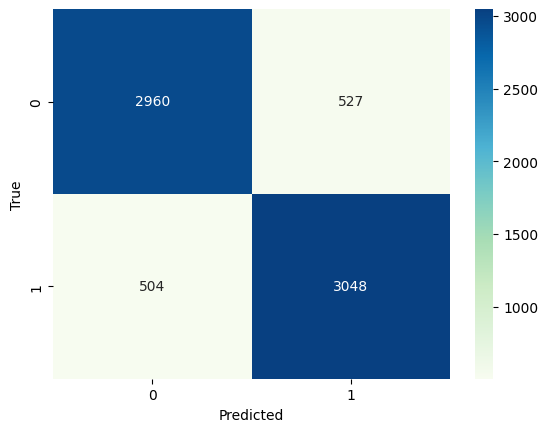

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predict = best_xgb_model.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    15162
1    11373
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,0
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_xgboost1.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


###Clasificador XGBOOST(2)(0,79)

Random Forest es un tipo de algoritmo de ensamble, lo que significa que combina múltiples modelos (en este caso, árboles de decisión) para mejorar el rendimiento general y reducir el sobreajuste. Esto se hace mediante el proceso de promedio o votación de los resultados de los árboles individuales.

Dado nuestros features,vamos a crear una instancia de random forest

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV



# Definir los parámetros del modelo, incluyendo los de regularización
xgb_params = {
    'random_state': [-1],  # Puedes probar diferentes valores
    'n_estimators': [200],  # Puedes probar diferentes números de estimadores
    'learning_rate': [0.2],  # Puedes probar diferentes tasas de aprendizaje
    'max_depth': [26],  # Puedes probar diferentes profundidades máximas
    'subsample': [0.8],  # Puedes probar diferentes valores de subsample
    'colsample_bytree': [1.0],  # Puedes probar diferentes valores de colsample_bytree
    'gamma': [0.1],  # Puedes probar diferentes valores de gamma
    'alpha': [ 0.1],  # Puedes probar diferentes valores de alpha
    'lambda': [0.1]  # Puedes probar diferentes valores de lambda
}

# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier()

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)

# Mostrar los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar el modelo con los mejores hiperparámetros
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mejores hiperparámetros: {'alpha': 0.1, 'colsample_bytree': 1.0, 'gamma': 0.1, 'lambda': 0.1, 'learning_rate': 0.2, 'max_depth': 26, 'n_estimators': 200, 'random_state': -1, 'subsample': 0.8}


XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.1, learning_rate=0.2,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=26, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, ...)

In [ ]:

#Predicción con mejor estimador
y_pred=best_xgb_model.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8669325303165948

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

,test,pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(50.722222222222214, 0.5, 'True')

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

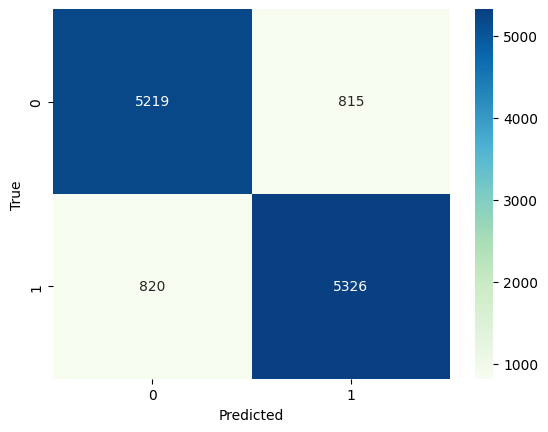

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predict = best_xgb_model.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    14548
1    11987
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,0
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_xgboost2.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


###Clasificador XGBOOST(3)(0,80)

Random Forest es un tipo de algoritmo de ensamble, lo que significa que combina múltiples modelos (en este caso, árboles de decisión) para mejorar el rendimiento general y reducir el sobreajuste. Esto se hace mediante el proceso de promedio o votación de los resultados de los árboles individuales.

Dado nuestros features,vamos a crear una instancia de random forest

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV



# Definir los parámetros del modelo, incluyendo los de regularización
xgb_params = {
    'random_state': [-1],  # Puedes probar diferentes valores
    'n_estimators': [500],  # Puedes probar diferentes números de estimadores
    'learning_rate': [0.2],  # Puedes probar diferentes tasas de aprendizaje
    'max_depth': [20],  # Puedes probar diferentes profundidades máximas
    'subsample': [0.8],  # Puedes probar diferentes valores de subsample
    'colsample_bytree': [1.0],  # Puedes probar diferentes valores de colsample_bytree
    'gamma': [0.1],  # Puedes probar diferentes valores de gamma
    'alpha': [ 0.1],  # Puedes probar diferentes valores de alpha
    'lambda': [0.1]  # Puedes probar diferentes valores de lambda
}

# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier()

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)

# Mostrar los mejores hiperparámetros
best_params = grid_search.best_params_


# Entrenar el modelo con los mejores hiperparámetros
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.1, learning_rate=0.2,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, ...)

In [ ]:

#Predicción con mejor estimador
y_pred=best_xgb_model.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8676243811378946

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,test,pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(50.722222222222214, 0.5, 'True')

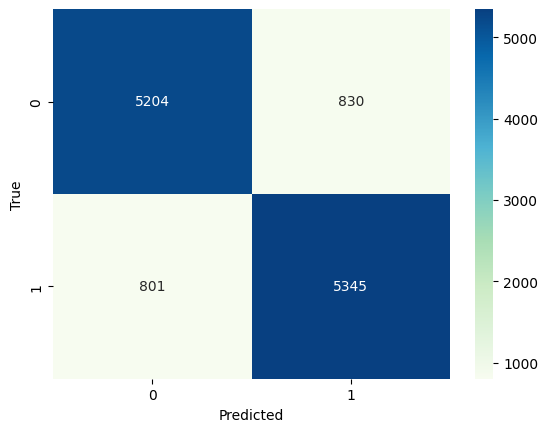

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predict = best_xgb_model.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    14444
1    12091
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,1
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_xgboost3.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###Clasificador XGBOOST(4)(0,80)

Random Forest es un tipo de algoritmo de ensamble, lo que significa que combina múltiples modelos (en este caso, árboles de decisión) para mejorar el rendimiento general y reducir el sobreajuste. Esto se hace mediante el proceso de promedio o votación de los resultados de los árboles individuales.

Dado nuestros features,vamos a crear una instancia de random forest

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV



# Definir los parámetros del modelo, incluyendo los de regularización
xgb_params = {
    'random_state': [-1],  # Puedes probar diferentes valores
    'n_estimators': [185],  # Puedes probar diferentes números de estimadores
    'learning_rate': [0.2],  # Puedes probar diferentes tasas de aprendizaje
    'max_depth': [16],  # Puedes probar diferentes profundidades máximas
    'subsample': [0.8],  # Puedes probar diferentes valores de subsample
    'colsample_bytree': [1.0],  # Puedes probar diferentes valores de colsample_bytree
    'gamma': [0.1],  # Puedes probar diferentes valores de gamma
    'alpha': [ 0.1],  # Puedes probar diferentes valores de alpha
    'lambda': [0.1]  # Puedes probar diferentes valores de lambda
}

# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier()

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=xgb_modeZl, param_grid=xgb_params, cv=5, scoring='f1')
grid_search.fit(x_train, y_train)

# Mostrar los mejores hiperparámetros
best_params = grid_search.best_params_


# Entrenar el modelo con los mejores hiperparámetros
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.1, learning_rate=0.2,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=185, n_jobs=None, ...)

In [ ]:

#Predicción con mejor estimador
y_pred=best_xgb_model.predict(x_test)

#Accuracy test
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8707008436080468

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,test,pred
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(50.722222222222214, 0.5, 'True')

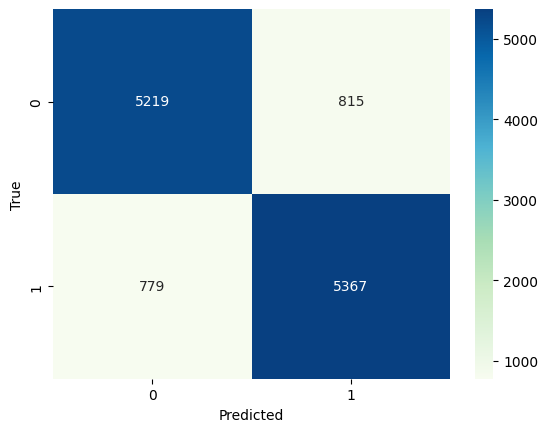

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
ds_test_prediccion = ds_hoteles_test.copy()

ds_test_prediccion['market_segment_Undefined'] = 0
ds_test_prediccion['distribution_channel_Undefined'] = 0
ds_test_prediccion['agent'] = ds_test_prediccion['agent'].fillna('-1')
ds_test_prediccion['company'] = ds_test_prediccion['company'].fillna('-1')

ds_test_prediccion.drop('id', inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predict = best_xgb_model.predict(ds_test_prediccion[features])

ds_resultados=pd.DataFrame(zip(ds_hoteles_test['id'], predict),columns=['id','is_canceled'])

ds_resultados['is_canceled'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    14590
1    11945
Name: is_canceled, dtype: int64

In [ ]:
ds_resultados_copy_csv = ds_resultados.copy()
ds_resultados_copy_csv.set_index("id", inplace = True)
ds_resultados_copy_csv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,is_canceled
id,
e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
aba9aac2-4495-4645-a60e-90328713c999,0
b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
ce1b400e-afa1-4946-bdff-004b859eb61c,1
c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...
636ccded-66ad-4538-8006-c0b9f84c6256,0
11e19741-bd28-4459-8ea3-184f1664000f,0
36a4c7b0-d6b1-4528-93db-311be96ec1c6,1


In [ ]:
ds_resultados.to_csv("predicciones_xgboost4.csv", index = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
